## Projekt Priad 2020 klasyfikacje tekstów piosenek

### Wczytanie danych

In [1]:
import numpy as np
import pandas as pd
import lyricsgenius
import json
import requests
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.utils.extmath import density
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
lemmatizer = WordNetLemmatizer() 
genius = lyricsgenius.Genius("soOLiPdEPwYDC5ZwsK2Td_jDeG8ZS9FIdNSBnL5dEkfHUsvnjBje47xs6EWG8QJe")

In [2]:
r = requests.get('https://raw.githubusercontent.com/priad2020/songs/master/songs.json')
c = r.text
data = json.loads(c)
popList = data.get("pop")
rockList = data.get("rock")
rapList = data.get("rap")

In [3]:
r = requests.get('https://raw.githubusercontent.com/priad2020/songs/master/stopwords.json')
c = r.text
data = json.loads(c)
stopWords = data["words"]

In [4]:
def Songs(List):
    songs = []
    for i in List: 
        songs.append(genius.search_song(i).lyrics)
    return songs


In [6]:
popsongs = Songs(popList)

Searching for "Shape of You"...
Done.
Searching for "thank u, next"...
Done.
Searching for "The Hills"...
Done.
Searching for "God’s Plan"...
Done.
Searching for "Drunk in Love"...
Done.
Searching for "Bohemian Rhapsody"...
Done.
Searching for "Work from Home"...
Done.
Searching for "Too Good at Goodbyes"...
Done.
Searching for "Vogue"...
Done.
Searching for "7 rings"...
Done.
Searching for "Hotline Bling"...
Done.
Searching for "Closer"...
Done.
Searching for "Starboy"...
Done.
Searching for "Shallow"...
Done.
Searching for "Formation"...
Done.
Searching for "One Dance"...
Done.
Searching for "Perfect"...
Done.
Searching for "FRIENDS"...
Done.
Searching for "I’m the One"...
Done.
Searching for "Money Trees"...
Done.
Searching for "Hello"...
Done.
Searching for "Thrift Shop"...
Done.
Searching for "New Rules"...
Done.
Searching for "Poetic Justice"...
Done.
Searching for "White Iverson"...
Done.
Searching for "Love Yourself"...
Done.
Searching for "Can’t Hold Us"...
Done.
Searching for

In [7]:
rocksongs = Songs(rockList)

Searching for "I Can’t Drive 55"...
Done.
Searching for "Lit Up"...
Done.
Searching for "Frankenstein"...
Done.
Searching for "Carry On Wayward Son"...
Done.
Searching for "Higher"...
Done.
Searching for "I Believe In A Thing Called Love"...
Done.
Searching for "Turn Up The Radio"...
Done.
Searching for "Don’t Tell Me You Love Me"...
Done.
Searching for "Bullet With Butterfly Wings"...
Done.
Searching for "Aqualung"...
Done.
Searching for "Party Hard"...
Done.
Searching for "Would?"...
Done.
Searching for "Seventeen"...
Done.
Searching for "The Beautiful People"...
Done.
Searching for "Slither"...
Done.
Searching for "I Wanna Be Somebody"...
Done.
Searching for "Bring Me To Life"...
Done.
Searching for "Since You Been Gone"...
Done.
Searching for "Heaven And Hell"...
Done.
Searching for "Any Way You Want It"...
Done.
Searching for "Rebel Yell"...
Done.
Searching for "Feel Like Making Love"...
Done.
Searching for "Black Hole Sun"...
Done.
Searching for "Kiss Me Deadly"...
Done.
Searchin

In [11]:
rapsongs = Songs(rapList)

Searching for "Rap God"...
Done.
Searching for "Savage"...
Done.
Searching for "Bitch, Don’t Kill My Vibe"...
Done.
Searching for "HUMBLE."...
Done.
Searching for "Bad and Boujee"...
Done.
Searching for "Man’s Not Hot"...
Done.
Searching for "God’s Plan"...
Done.
Searching for "SICKO MODE"...
Done.
Searching for "Bodak Yellow"...
Done.
Searching for "XO TOUR Llif3"...
Done.
Searching for "1-800-273-8255"...
Done.
Searching for "In My Feelings"...
Done.
Searching for "SAD!"...
Done.
Searching for "Trap Queen"...
Done.
Searching for "Hotline Bling"...
Done.
Searching for "rockstar"...
Done.
Searching for "Mercy"...
Done.
Searching for "m.A.A.d city"...
Done.
Searching for "Killshot"...
Done.
Searching for "Starboy"...
Done.
Searching for "Jocelyn Flores"...
Done.
Searching for "Holy Grail"...
Done.
Searching for "One Dance"...
Done.
Searching for "Niggas in Paris"...
Done.
Searching for "Panda"...
Done.
Searching for "Look At Me!"...
Done.
Searching for "I’m the One"...
Done.
Searching f

### Przygotowanie danych

In [12]:
def songs(songs,stopWords):
    songList = []
    punctuation = ["!",",", ".",'"', ":", ";", "?" ,"(",")","—","–","-", "*","”","“","&"
                   "»","…","«","—","[","]"] 
    for song in songs:
        song = song.lower()
        for sign in punctuation:
             song = song.replace(sign,"")
                
        lyrics = ""            
        for word in song.split():
            if not(word in stopWords):
                word = word.replace("’","")
                word =word.replace("'","")
                word = lemmatizer.lemmatize(word)
                lyrics += word + " "
        songList.append(lyrics)
                
    return  songList

In [100]:
poplyrics = songs(popsongs,stopWords)
rocklyrics = songs(rocksongs,stopWords)
raplyrics = songs(rapsongs,stopWords)

### Podział danych na zbór uczący i testowy

In [23]:
def split(poplyrics,rocklyrics,raplyrics):
    length_pop = len(poplyrics)
    lengthLern_pop = int(length_pop * 0.3)
    poplyrics_Learn = poplyrics[0:lengthLern_pop ]
    poplyrics_Test = poplyrics[lengthLern_pop +1:]

    length_rock = len(rocklyrics)
    lengthLern_rock = int(length_rock * 0.3)
    rocklyrics_Learn = rocklyrics[0:lengthLern_rock]
    rocklyrics_Test = rocklyrics[lengthLern_rock+1:]

    length_rap = len(raplyrics)
    lengthLern_rap = int(length_rap * 0.3)
    raplyrics_Learn = raplyrics[0:lengthLern_rap]
    raplyrics_Test = raplyrics[lengthLern_rap+1:]
    return [poplyrics_Learn, poplyrics_Test, rocklyrics_Learn,rocklyrics_Test,raplyrics_Learn,raplyrics_Test] 


In [24]:
[poplyrics_Learn, poplyrics_Test, rocklyrics_Learn,rocklyrics_Test,raplyrics_Learn,raplyrics_Test] = split(poplyrics,rocklyrics,raplyrics)

### Metryki dla zbioru uczącego

In [25]:
def CreateData(poplyrics,rocklyrics,raplyrics):
    pop = ""
    for subList in poplyrics:
        pop += subList

    rock = ""
    for subList in rocklyrics:
        rock += subList

    rap =""
    for subList in raplyrics:
        rap += subList    

    return [ pop,rock,rap] 

In [26]:
[pop_data,rock_data,rap_data] = CreateData(poplyrics_Learn,rocklyrics_Learn,raplyrics_Learn)
dane =[pop_data,rock_data,rap_data]


### Porównywanie Dokumentów 

In [39]:
def distance(x, y, typ = 'Cosinus'):
    if typ == 'Cosinus':
        return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))
    elif typ == 'Eukledis':
        return np.sqrt(np.sum((x - y) ** 2))
    else: # miejska
        return np.sum(np.abs(x - y))

In [40]:
tfVektorizer = CountVectorizer()
tf = np.array(tfVektorizer.fit_transform(dane).todense())

tfidfVectorizer = TfidfVectorizer()
tfidf = np.array(tfidfVectorizer.fit_transform(dane).todense())

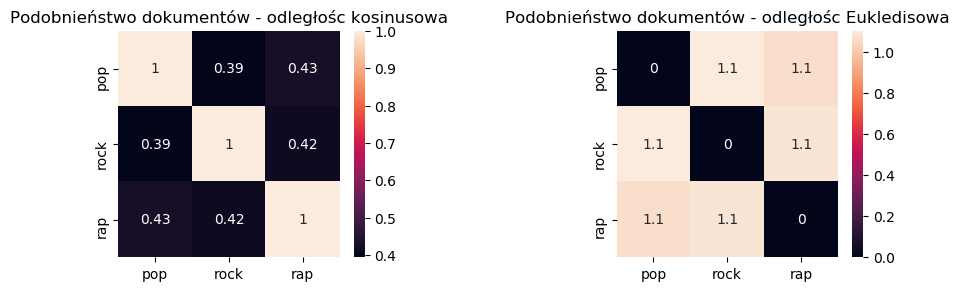

In [41]:
types = ["pop","rock","rap"]

mac_odl_cos = np.empty([3,3])
mac_odl_euk = np.empty([3,3])
for i in range(0,3):
    for j in range(0,3):
        mac_odl_cos[i,j] = distance(tfidf[i],tfidf[j],"Cosinus")
        mac_odl_euk[i,j] = distance(tfidf[i],tfidf[j],'Eukledis')
            
plt.figure(figsize=(10,3),dpi = 100)
plt.subplots_adjust(wspace=0.8,hspace=0.1)
plt.subplot(1,2,1)
plt.title("Podobnieństwo dokumentów - odległośc kosinusowa")
sns.heatmap(pd.DataFrame( mac_odl_cos, index = types, columns = types),annot =  mac_odl_cos)
plt.subplot(1,2,2)
plt.title("Podobnieństwo dokumentów - odległośc Eukledisowa")
sns.heatmap(pd.DataFrame( mac_odl_euk, index = types, columns = types),annot = mac_odl_euk)

### Przygotowanie zbioru uczącego i testowego 


In [42]:
def prepareData(popwords,rockwords,rapwords):
    df = pd.DataFrame(columns= ["type","text","length"])
    for i in popwords:
        df = df.append({"type": "pop","text":i,"length":len(i.split(" "))},ignore_index=True)
    for i in rockwords:
        df = df.append({"type": "rock","text":i,"length":len(i.split(" "))},ignore_index=True)
    for i in rapwords:
        df = df.append({"type": "rap","text":i,"length":len(i.split(" "))},ignore_index=True)
    return df

In [43]:
train_df = prepareData(poplyrics_Learn,rocklyrics_Learn,raplyrics_Learn)
test_df = prepareData(poplyrics_Test,rocklyrics_Test,raplyrics_Test)

In [44]:
X_trainTfidf=tfidfVectorizer.transform(train_df['text'])
X_testTfidf=tfidfVectorizer.transform(test_df['text'])


In [45]:
X_trainTf=tfVektorizer.transform(train_df['text'])
X_testTf=tfVektorizer.transform(test_df['text'])

In [47]:
def TrainAndTestModel(model, X_train, train_genre, X_test, test_genre, metod,metric):
    model.fit(X_train, train_genre)
    print("Dokładność klasyfikacji metodą " +str(metod)+ " z użyciem " + str(metric) +": " + str(model.score(X_test, test_genre)))
    target = test_genre
    predicted = model.predict(X_test)
    print (metrics.classification_report(target, predicted, digits=4))

### Regresja Logistyczna

In [48]:
model = LogisticRegression(class_weight='balanced', dual=False,max_iter=1000)

In [49]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "Regresji logistycznej","tf")

Dokładność klasyfikacji metodą Regresji logistycznej z użyciem tf: 0.5256410256410257
              precision    recall  f1-score   support

         pop     0.4118    0.1373    0.2059        51
         rap     0.8235    0.5283    0.6437        53
        rock     0.4476    0.9038    0.5987        52

    accuracy                         0.5256       156
   macro avg     0.5610    0.5231    0.4828       156
weighted avg     0.5636    0.5256    0.4856       156



In [50]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "Regresji logistycznej","Tf-idf")

Dokładność klasyfikacji metodą Regresji logistycznej z użyciem Tf-idf: 0.5384615384615384
              precision    recall  f1-score   support

         pop     0.4194    0.2549    0.3171        51
         rap     0.6786    0.7170    0.6972        53
        rock     0.4783    0.6346    0.5455        52

    accuracy                         0.5385       156
   macro avg     0.5254    0.5355    0.5199       156
weighted avg     0.5271    0.5385    0.5224       156



### Metoda Wektorów Nośnych

In [51]:
model = LinearSVC( dual=False,max_iter=10000)

In [52]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "wektorów nośnych","tf")


Dokładność klasyfikacji metodą wektorów nośnych z użyciem tf: 0.4807692307692308
              precision    recall  f1-score   support

         pop     0.3158    0.1176    0.1714        51
         rap     0.7273    0.4528    0.5581        53
        rock     0.4327    0.8654    0.5769        52

    accuracy                         0.4808       156
   macro avg     0.4919    0.4786    0.4355       156
weighted avg     0.4946    0.4808    0.4380       156



In [53]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "wektorów nośnych","Tf-idf")

Dokładność klasyfikacji metodą wektorów nośnych z użyciem Tf-idf: 0.5384615384615384
              precision    recall  f1-score   support

         pop     0.4583    0.2157    0.2933        51
         rap     0.6094    0.7358    0.6667        53
        rock     0.5000    0.6538    0.5667        52

    accuracy                         0.5385       156
   macro avg     0.5226    0.5351    0.5089       156
weighted avg     0.5235    0.5385    0.5113       156



### RidgeClassifier

In [54]:
model = RidgeClassifier()

In [55]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "Ridge","tf")

Dokładność klasyfikacji metodą Ridge z użyciem tf: 0.48717948717948717
              precision    recall  f1-score   support

         pop     0.3684    0.1373    0.2000        51
         rap     0.8077    0.3962    0.5316        53
        rock     0.4324    0.9231    0.5890        52

    accuracy                         0.4872       156
   macro avg     0.5362    0.4855    0.4402       156
weighted avg     0.5390    0.4872    0.4423       156



In [56]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "Ridge","Tf-idf")

Dokładność klasyfikacji metodą Ridge z użyciem Tf-idf: 0.5448717948717948
              precision    recall  f1-score   support

         pop     0.4545    0.1961    0.2740        51
         rap     0.6154    0.7547    0.6780        53
        rock     0.5072    0.6731    0.5785        52

    accuracy                         0.5449       156
   macro avg     0.5257    0.5413    0.5102       156
weighted avg     0.5268    0.5449    0.5127       156



### SGDClassifier

In [57]:
model = SGDClassifier()

In [58]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "SGDC","tf")

Dokładność klasyfikacji metodą SGDC z użyciem tf: 0.4935897435897436
              precision    recall  f1-score   support

         pop     0.3214    0.1765    0.2278        51
         rap     0.5263    0.7547    0.6202        53
        rock     0.5385    0.5385    0.5385        52

    accuracy                         0.4936       156
   macro avg     0.4621    0.4899    0.4622       156
weighted avg     0.4634    0.4936    0.4647       156



In [59]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "SGDC","Tf-idf")

Dokładność klasyfikacji metodą SGDC z użyciem Tf-idf: 0.5512820512820513
              precision    recall  f1-score   support

         pop     0.4706    0.1569    0.2353        51
         rap     0.6545    0.6792    0.6667        53
        rock     0.5000    0.8077    0.6176        52

    accuracy                         0.5513       156
   macro avg     0.5417    0.5479    0.5065       156
weighted avg     0.5429    0.5513    0.5093       156



### PassiveAggressiveClassifier

In [60]:
model =PassiveAggressiveClassifier()

In [61]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "PassiveAggressive","tf")

Dokładność klasyfikacji metodą PassiveAggressive z użyciem tf: 0.4935897435897436
              precision    recall  f1-score   support

         pop     0.3846    0.1961    0.2597        51
         rap     0.7647    0.4906    0.5977        53
        rock     0.4271    0.7885    0.5541        52

    accuracy                         0.4936       156
   macro avg     0.5255    0.4917    0.4705       156
weighted avg     0.5279    0.4936    0.4727       156



In [62]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "PassiveAggressive","Tf-idf")

Dokładność klasyfikacji metodą PassiveAggressive z użyciem Tf-idf: 0.5192307692307693
              precision    recall  f1-score   support

         pop     0.4500    0.1765    0.2535        51
         rap     0.5467    0.7736    0.6406        53
        rock     0.5082    0.5962    0.5487        52

    accuracy                         0.5192       156
   macro avg     0.5016    0.5154    0.4809       156
weighted avg     0.5022    0.5192    0.4834       156



### BernoulliNB

In [63]:
model = BernoulliNB()

In [64]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "BernoulliNB","tf")

Dokładność klasyfikacji metodą BernoulliNB z użyciem tf: 0.3782051282051282
              precision    recall  f1-score   support

         pop     0.2000    0.0588    0.0909        51
         rap     1.0000    0.0943    0.1724        53
        rock     0.3750    0.9808    0.5426        52

    accuracy                         0.3782       156
   macro avg     0.5250    0.3780    0.2686       156
weighted avg     0.5301    0.3782    0.2691       156



In [65]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "BernoulliNB","Tf-idf")

Dokładność klasyfikacji metodą BernoulliNB z użyciem Tf-idf: 0.3782051282051282
              precision    recall  f1-score   support

         pop     0.2000    0.0588    0.0909        51
         rap     1.0000    0.0943    0.1724        53
        rock     0.3750    0.9808    0.5426        52

    accuracy                         0.3782       156
   macro avg     0.5250    0.3780    0.2686       156
weighted avg     0.5301    0.3782    0.2691       156



### MultinomialNB

In [66]:
model = MultinomialNB()

In [67]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "MultinomialNB","tf")

Dokładność klasyfikacji metodą MultinomialNB z użyciem tf: 0.5384615384615384
              precision    recall  f1-score   support

         pop     0.4400    0.4314    0.4356        51
         rap     0.5758    0.7170    0.6387        53
        rock     0.6000    0.4615    0.5217        52

    accuracy                         0.5385       156
   macro avg     0.5386    0.5366    0.5320       156
weighted avg     0.5395    0.5385    0.5333       156



In [68]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "MultinomialNB","Tf-idf")

Dokładność klasyfikacji metodą MultinomialNB z użyciem Tf-idf: 0.4807692307692308
              precision    recall  f1-score   support

         pop     0.4615    0.1176    0.1875        51
         rap     0.4526    0.8113    0.5811        53
        rock     0.5417    0.5000    0.5200        52

    accuracy                         0.4808       156
   macro avg     0.4853    0.4763    0.4295       156
weighted avg     0.4852    0.4808    0.4320       156



### KNeighborsClassifier

In [69]:
model = KNeighborsClassifier()

In [70]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "KNeighborsClassifier","tf")

Dokładność klasyfikacji metodą KNeighborsClassifier z użyciem tf: 0.33974358974358976
              precision    recall  f1-score   support

         pop     0.0000    0.0000    0.0000        51
         rap     1.0000    0.0189    0.0370        53
        rock     0.3355    1.0000    0.5024        52

    accuracy                         0.3397       156
   macro avg     0.4452    0.3396    0.1798       156
weighted avg     0.4516    0.3397    0.1801       156



C:\Users\alabo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "KNeighborsClassifier","Tf-idf")

Dokładność klasyfikacji metodą KNeighborsClassifier z użyciem Tf-idf: 0.48717948717948717
              precision    recall  f1-score   support

         pop     0.4250    0.3333    0.3736        51
         rap     0.4935    0.7170    0.5846        53
        rock     0.5385    0.4038    0.4615        52

    accuracy                         0.4872       156
   macro avg     0.4857    0.4847    0.4733       156
weighted avg     0.4861    0.4872    0.4746       156



### NearestCentroid

In [72]:
model = NearestCentroid()

In [73]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "NearestCentroid","tf")

Dokładność klasyfikacji metodą NearestCentroid z użyciem tf: 0.5064102564102564
              precision    recall  f1-score   support

         pop     0.2000    0.0588    0.0909        51
         rap     0.8286    0.5472    0.6591        53
        rock     0.4434    0.9038    0.5949        52

    accuracy                         0.5064       156
   macro avg     0.4907    0.5033    0.4483       156
weighted avg     0.4947    0.5064    0.4520       156



In [74]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "NearestCentroid","Tf-idf")

Dokładność klasyfikacji metodą NearestCentroid z użyciem Tf-idf: 0.5128205128205128
              precision    recall  f1-score   support

         pop     0.3684    0.2745    0.3146        51
         rap     0.6724    0.7358    0.7027        53
        rock     0.4500    0.5192    0.4821        52

    accuracy                         0.5128       156
   macro avg     0.4969    0.5099    0.4998       156
weighted avg     0.4989    0.5128    0.5023       156



### Perceptron

In [75]:
model  = Perceptron()

In [76]:
TrainAndTestModel(model, X_trainTf ,train_df['type'],X_testTf, test_df['type'], "Perceptron","tf")

Dokładność klasyfikacji metodą Perceptron z użyciem tf: 0.4807692307692308
              precision    recall  f1-score   support

         pop     0.3793    0.2157    0.2750        51
         rap     0.4699    0.7358    0.5735        53
        rock     0.5682    0.4808    0.5208        52

    accuracy                         0.4808       156
   macro avg     0.4725    0.4774    0.4565       156
weighted avg     0.4730    0.4808    0.4584       156



In [77]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "Perceptron","Tf-idf")

Dokładność klasyfikacji metodą Perceptron z użyciem Tf-idf: 0.5128205128205128
              precision    recall  f1-score   support

         pop     0.3939    0.2549    0.3095        51
         rap     0.6471    0.6226    0.6346        53
        rock     0.4722    0.6538    0.5484        52

    accuracy                         0.5128       156
   macro avg     0.5044    0.5105    0.4975       156
weighted avg     0.5060    0.5128    0.4996       156



### Analiza eksploracyjna

In [78]:
def createDicionary(words):
    dic = {}
    for word in sorted(words):
        if word in  dic.keys():
             dic[word] =  dic[word] + 1
        else:
             dic[word] = 1
    return  dic

In [101]:
def CreateData(poplyrics,rocklyrics,raplyrics):

    for i in range(0,len(poplyrics)):
            poplyrics[i] = poplyrics[i].split()
    for i in range(0,len(rocklyrics)):
            rocklyrics[i] = rocklyrics[i].split()
    for i in range(0,len(raplyrics)):
            raplyrics[i] = raplyrics[i].split()
    
    pop = []
    for subList in  poplyrics:
        pop += subList

    rock = []
    for subList in rocklyrics:
        rock += subList

    rap = []
    for subList in raplyrics:
        rap += subList
        
    pop_Dict = createDicionary(pop)
    rock_Dict = createDicionary(rock)
    rap_Dict = createDicionary(rap)
    
    pop_Dict = sorted(pop_Dict.items(), key=lambda x: x[1], reverse=True)
    rock_Dict = sorted(rock_Dict.items(), key=lambda x: x[1], reverse=True)
    rap_Dict = sorted(rap_Dict.items(), key=lambda x: x[1], reverse=True)
    return [pop_Dict[0:8], rock_Dict[0:8],rap_Dict[0:8]]
            

In [102]:
[popdata,rockdata,rapdata] = CreateData(poplyrics,rocklyrics,raplyrics)

In [135]:
def drawDiagram(data,title,genre):
    labels = [item[0] for item in data]
    val= [item[1] for item in data]

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=labels, values= val),1, 1)
  
    fig.update_traces(hole=.4, hoverinfo="label+value",textposition='inside',textinfo='label')       

    fig.update_layout(
        title_text= title,
        showlegend=False,
        annotations=[dict(text=genre, x=0.19, y=0.5, font_size=20, showarrow=False)])
    fig.show()

In [136]:
drawDiagram( popdata,"Wykres 8 najpolularnejszych słów w popie","pop")
drawDiagram(rockdata,"Wykres 8 najpolularnejszych słów w rocku","rock")
drawDiagram(rapdata,"Wykres 8 najpolularnejszych słów w rapie","rap")